In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

In [5]:
df = pd.read_csv('../../data/Database_Cleaned.csv')

display(df.head())

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Year,Month,Month_Name,Day_of_Week,Has_Poster,Genre_List,Genre_Count,Primary_Genre
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021.0,12.0,December,Wednesday,True,"['Action', 'Adventure', 'Science Fiction']",3,Action
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022.0,3.0,March,Tuesday,True,"['Crime', 'Mystery', 'Thriller']",3,Crime
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122.0,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,2022.0,2.0,February,Friday,True,['Thriller'],1,Thriller
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076.0,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,2021.0,11.0,November,Wednesday,True,"['Animation', 'Comedy', 'Family', 'Fantasy']",4,Animation
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793.0,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,2021.0,12.0,December,Wednesday,True,"['Action', 'Adventure', 'Thriller', 'War']",4,Action


In [7]:
stats_summary = pd.DataFrame({
    'Total Movies': [len(df)],
    'Avg Rating': [df['Vote_Average'].mean().round(2)],
    'Avg Popularity': [df['Popularity'].mean().round(2)],
    'Total Votes': [df['Vote_Count'].sum()],
    'Unique Languages': [df['Original_Language'].nunique()],
    'Unique Genres': [len(set([g for sublist in df['Genre_List'] for g in sublist]))]
})
print(stats_summary)

   Total Movies  Avg Rating  Avg Popularity  Total Votes  Unique Languages  Unique Genres
0          9829        6.44           40.31   13687065.0                44             32


Distribution Analysis

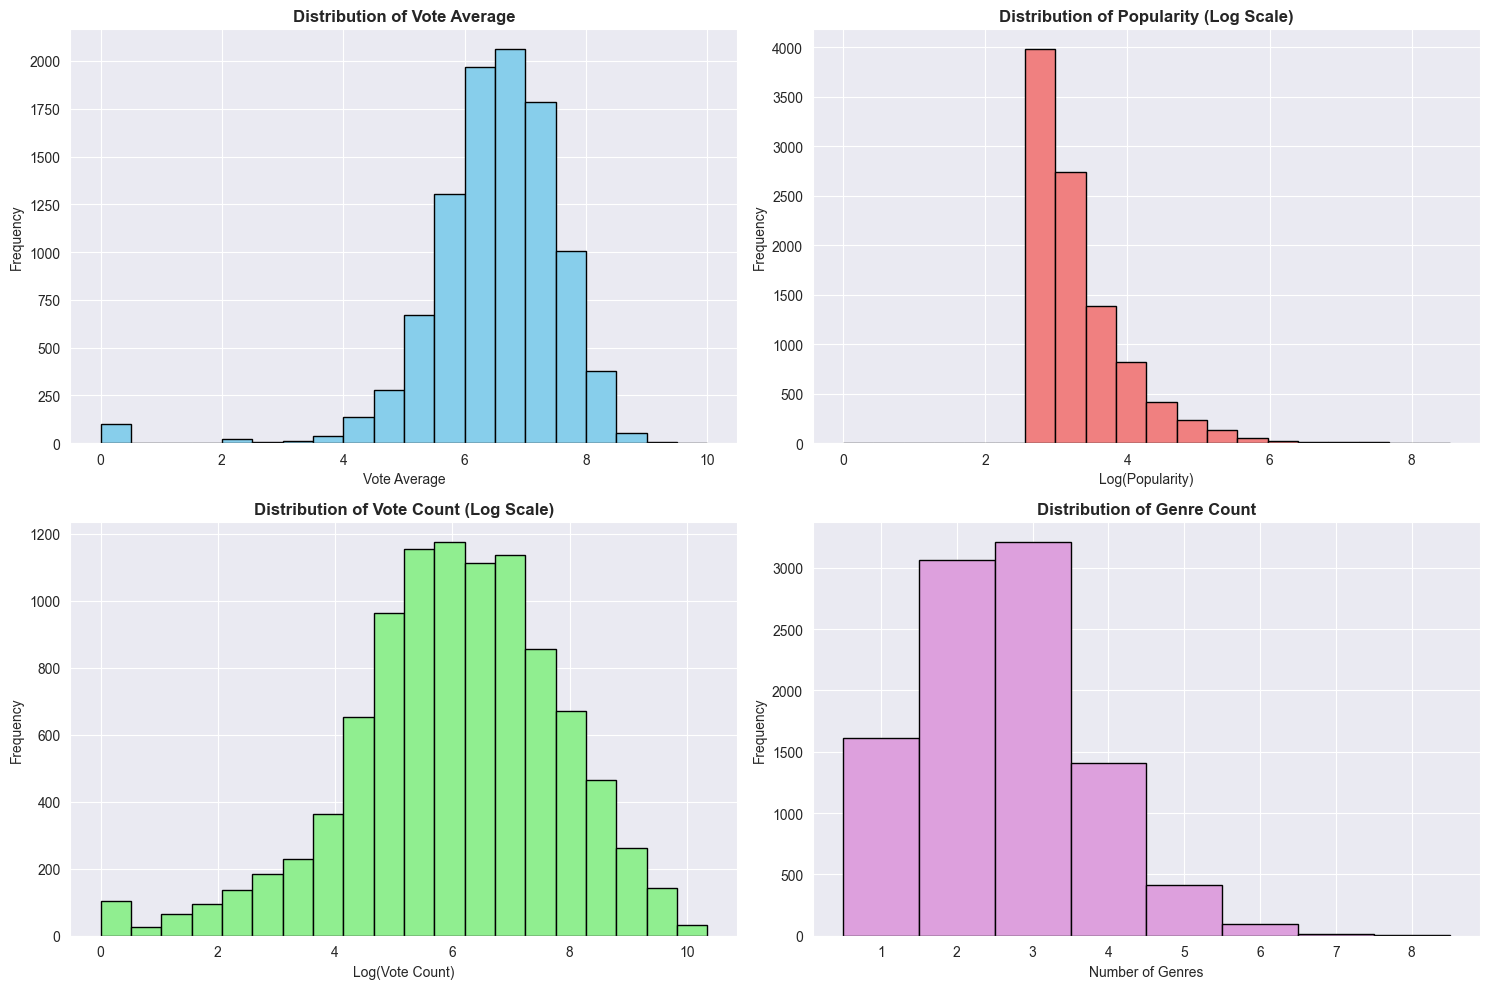

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Vote Average Distribution
axes[0, 0].hist(df['Vote_Average'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Vote Average', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Vote Average')
axes[0, 0].set_ylabel('Frequency')

# Popularity Distribution (log scale)
axes[0, 1].hist(np.log1p(df['Popularity']), bins=20, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Distribution of Popularity (Log Scale)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Log(Popularity)')
axes[0, 1].set_ylabel('Frequency')

# Vote Count Distribution (log scale)
axes[1, 0].hist(np.log1p(df['Vote_Count']), bins=20, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Distribution of Vote Count (Log Scale)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Log(Vote Count)')
axes[1, 0].set_ylabel('Frequency')

# Genre Count Distribution
axes[1, 1].hist(df['Genre_Count'], bins=range(1, df['Genre_Count'].max()+2),
                color='plum', edgecolor='black', align='left')
axes[1, 1].set_title('Distribution of Genre Count', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Number of Genres')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Categorical Analysis

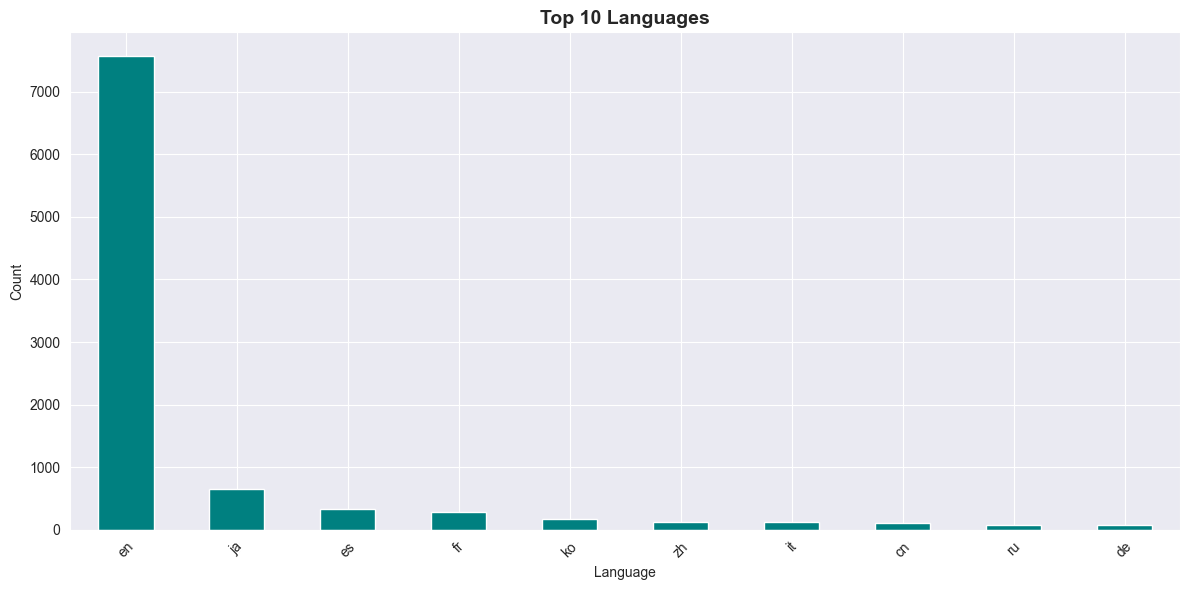

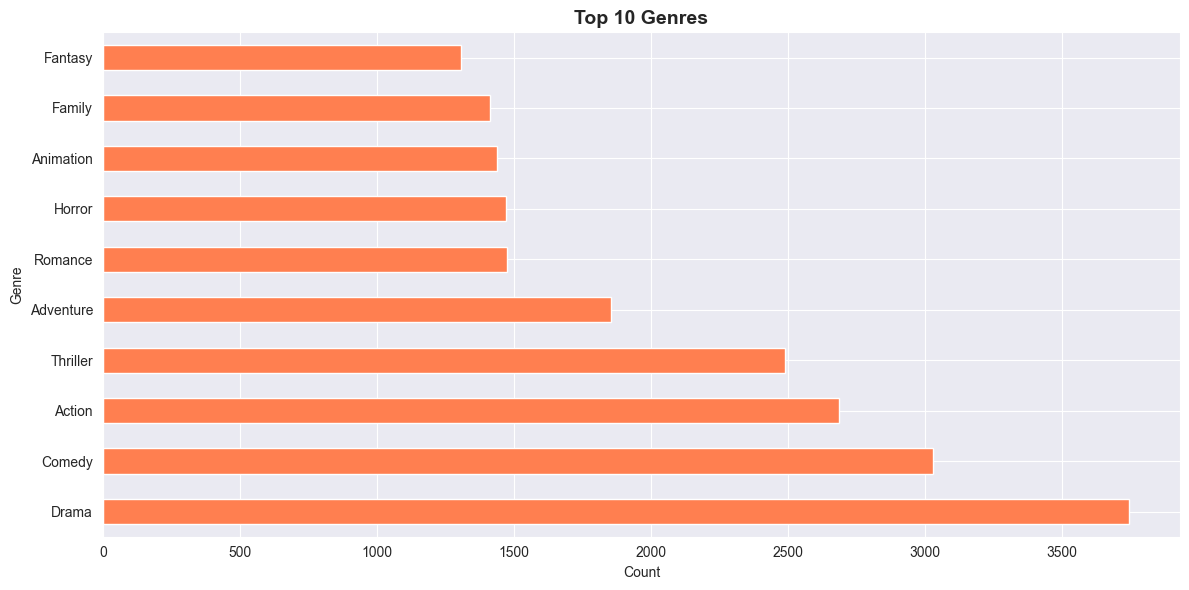

In [27]:
import ast

# Language Distribution
lang_dist = df['Original_Language'].value_counts().head(10)

plt.figure(figsize=(12, 6))
lang_dist.plot(kind='bar', color='teal')
plt.title('Top 10 Languages', fontsize=14, fontweight='bold')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Genre Distribution
all_genres = [g for sublist in df['Genre_List'].apply(ast.literal_eval) for g in sublist if g]
genre_counts = pd.Series(all_genres).value_counts().head(10)

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='barh', color='coral')
plt.title('Top 10 Genres', fontsize=14, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


Temporal Analysis

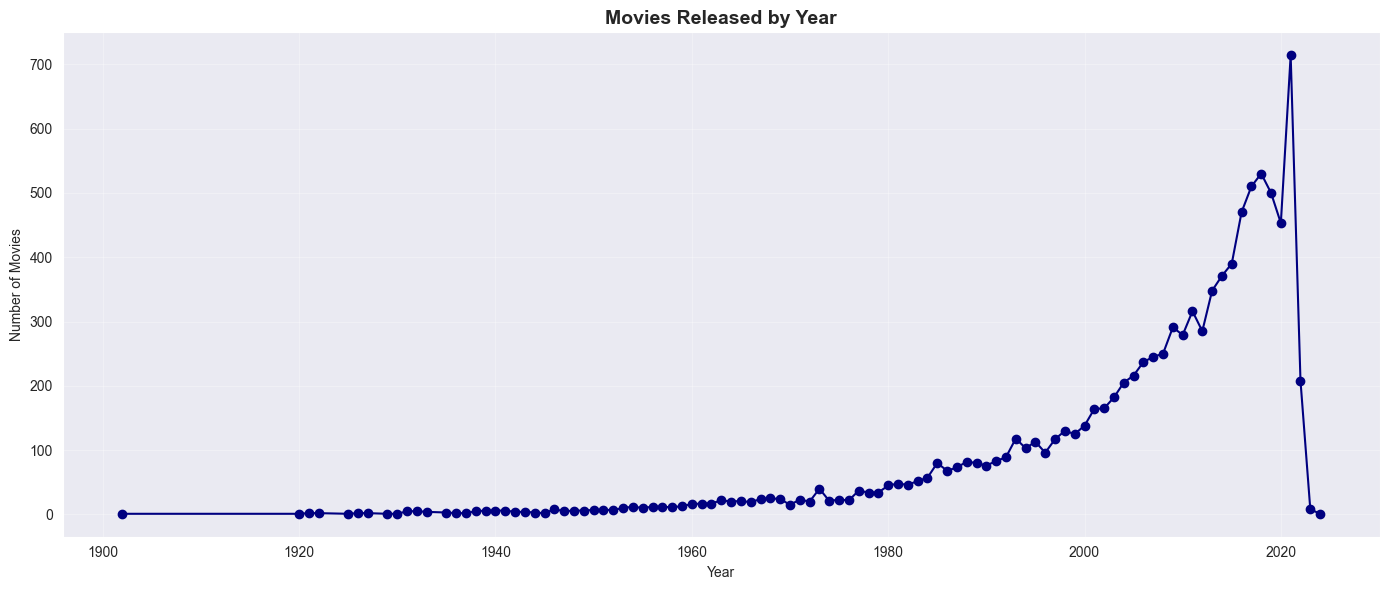

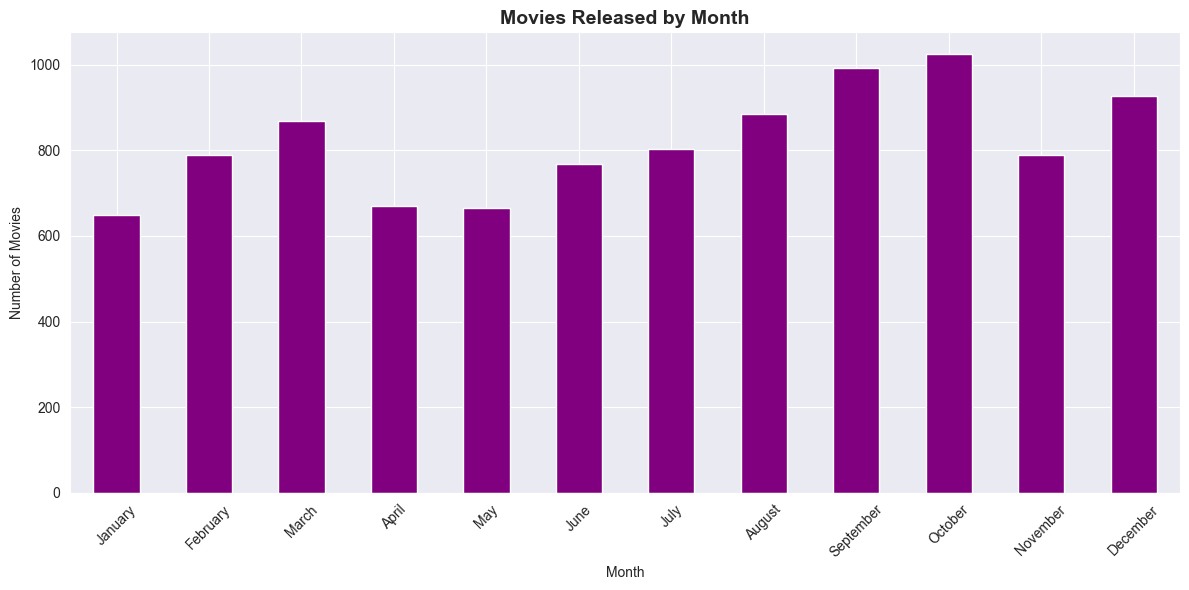

In [28]:
if df['Year'].notna().sum() > 0:
    # Movies by Year
    movies_by_year = df['Year'].value_counts().sort_index()

    plt.figure(figsize=(14, 6))
    movies_by_year.plot(kind='line', marker='o', color='navy')
    plt.title('Movies Released by Year', fontsize=14, fontweight='bold')
    plt.xlabel('Year')
    plt.ylabel('Number of Movies')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Movies by Month
    month_dist = df['Month_Name'].value_counts()
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    month_dist = month_dist.reindex([m for m in month_order if m in month_dist.index])

    plt.figure(figsize=(12, 6))
    month_dist.plot(kind='bar', color='purple')
    plt.title('Movies Released by Month', fontsize=14, fontweight='bold')
    plt.xlabel('Month')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Relationship Analysis

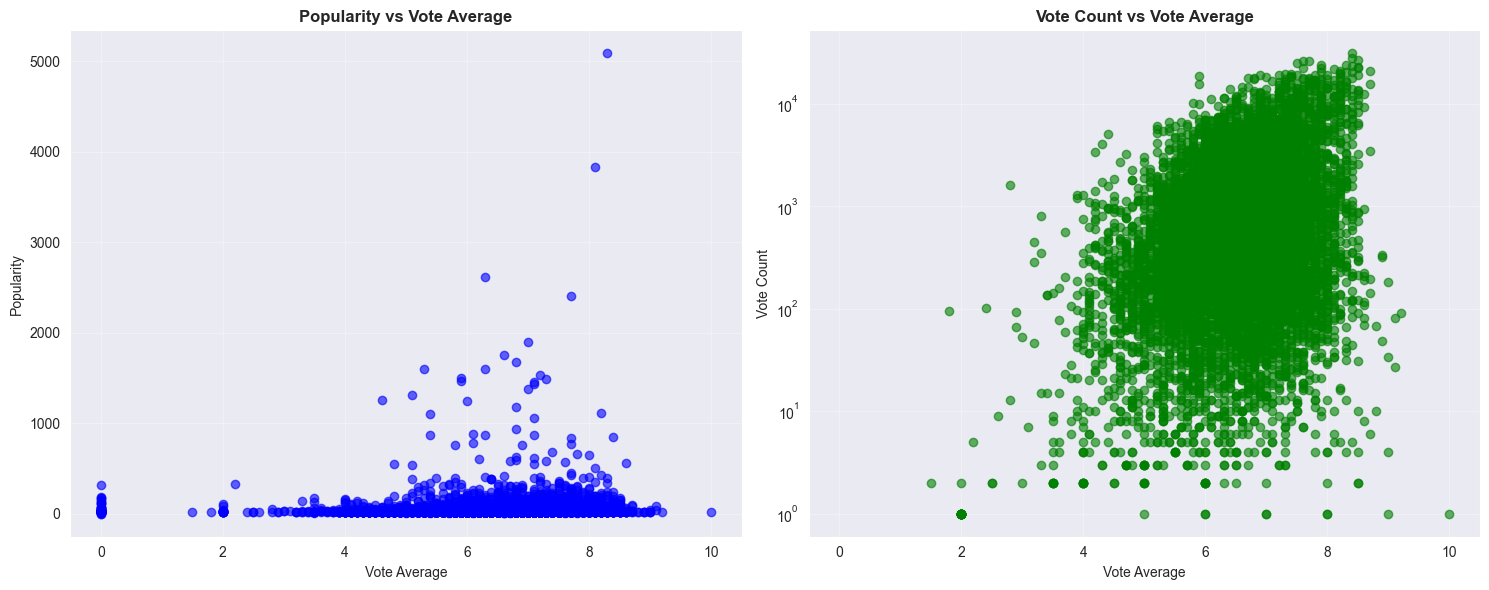

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Popularity vs Vote Average
axes[0].scatter(df['Vote_Average'], df['Popularity'], alpha=0.6, color='blue')
axes[0].set_title('Popularity vs Vote Average', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Vote Average')
axes[0].set_ylabel('Popularity')
axes[0].grid(True, alpha=0.3)

# Vote Count vs Vote Average
axes[1].scatter(df['Vote_Average'], df['Vote_Count'], alpha=0.6, color='green')
axes[1].set_title('Vote Count vs Vote Average', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Vote Average')
axes[1].set_ylabel('Vote Count')
axes[1].set_yscale('log')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

SUMMARY

In [44]:
print("\nDATASET OVERVIEW:")
print(f"- Total movies analyzed: {len(df):,}")
print(f"- Time period: {df['Year'].min():.0f} - {df['Year'].max():.0f}")
print(f"- Languages represented: {df['Original_Language'].nunique()}")

print("\nRATING INSIGHTS:")
print(f"- Average rating: {df['Vote_Average'].mean():.2f}/10")
print(f"- Median rating: {df['Vote_Average'].median():.2f}/10")
print(f"- Highest rated: {df['Vote_Average'].max():.1f}/10")
print(f"- Lowest rated: {df['Vote_Average'].min():.1f}/10")

print("\nPOPULARITY INSIGHTS:")
print(f"- Average popularity: {df['Popularity'].mean():.2f}")
print(f"- Most popular movie: {df.loc[df['Popularity'].idxmax(), 'Title']}")
print(f"- Popularity score: {df['Popularity'].max():.2f}")

print("\nGENRE INSIGHTS:")
print(f"- Total unique genres: {len(all_genres)}")
print(f"- Most common genre: {genre_counts.index[0]}")
print(f"- Average genres per movie: {df['Genre_Count'].mean():.2f}")

print("\nVOTING INSIGHTS:")
print(f"- Total votes: {df['Vote_Count'].sum():,}")
print(f"- Average votes per movie: {df['Vote_Count'].mean():.0f}")
print(f"- Most voted movie: {df.loc[df['Vote_Count'].idxmax(), 'Title']}")


DATASET OVERVIEW:
- Total movies analyzed: 9,829
- Time period: 1902 - 2024
- Languages represented: 44

RATING INSIGHTS:
- Average rating: 6.44/10
- Median rating: 6.50/10
- Highest rated: 10.0/10
   • Lowest rated: 0.0/10

POPULARITY INSIGHTS:
- Average popularity: 40.31
- Most popular movie: Spider-Man: No Way Home
- Popularity score: 5083.95

GENRE INSIGHTS:
- Total unique genres: 25792
- Most common genre: Drama
- Average genres per movie: 2.62

VOTING INSIGHTS:
- Total votes: 13,687,065.0
- Average votes per movie: 1393
- Most voted movie: Inception
